In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utility
from get_data import get_structured_data
from classifiers import *
from constants import *
from island_week_data import TurnipPattern

In [2]:
rows = [row for row in get_structured_data() if row.has_patterns_populated()]
all_X, all_rows, all_y = utility.get_all_data(rows)
all_X.shape, all_y.shape

((71, 12), (71, 1))

In [3]:
perfect_X, perfect_rows, perfect_y = utility.get_perfect_data(rows)
perfect_X.shape, perfect_y.shape

((25, 12), (25, 1))

In [13]:
def get_example_prices(data_x, data_y):
    all_values, indexes = np.unique(data_y, return_index=True)
    return data_x[indexes][-4:], data_y[indexes][-4:], indexes[-4:]

In [5]:
def get_pattern_names(data_patterns):
    output = []
    named_patterns = [(p.value[0], p.value[1]) for p in TurnipPattern][2:]
    for p in list(data_patterns):
        for name, val in named_patterns:
            if val == p:
                output.append(name)
    return output

In [14]:
def construct_graph_data(data_x, data_y):
    prices, raw_patterns, indexes = get_example_prices(data_x, data_y)
    named_patterns = get_pattern_names(raw_patterns)
    time_periods = np.asarray(list(range(12))).reshape(-1)
    return pd.DataFrame(data=prices, columns=time_periods, index=named_patterns), indexes

In [7]:
def graph_turnip_prices(data, keys, is_perfect=False):
    for k in keys:
        plt.title(f'{"Perfect " if is_perfect else ""}Turnip Pattern: {k}')
        sns.lineplot(x=data.columns, y=data.loc[k, :])
        plt.show()

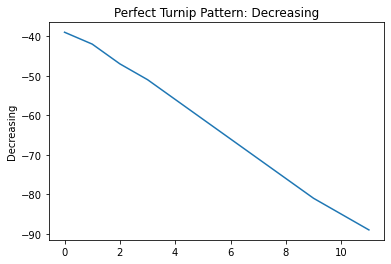

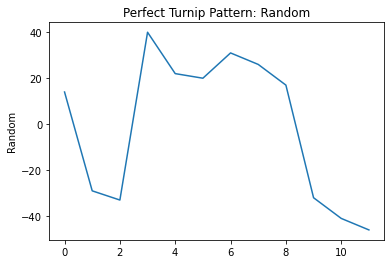

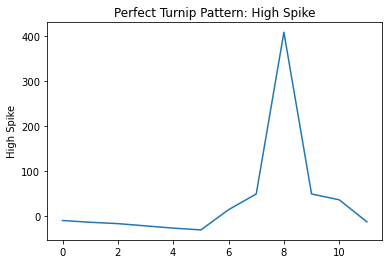

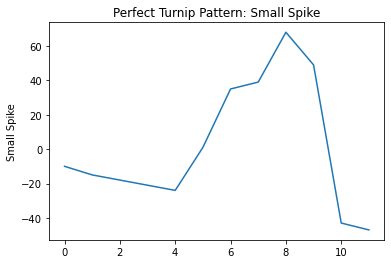

In [15]:
perfect_df, perfect_indexes = construct_graph_data(perfect_X, perfect_y)
graph_turnip_prices(perfect_df, perfect_df.index, is_perfect=True)

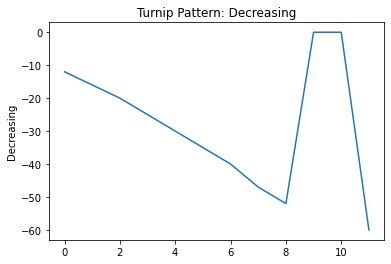

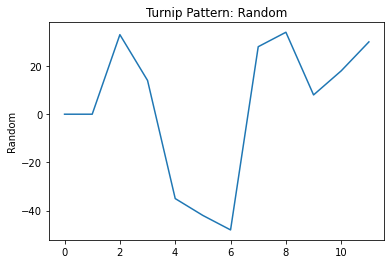

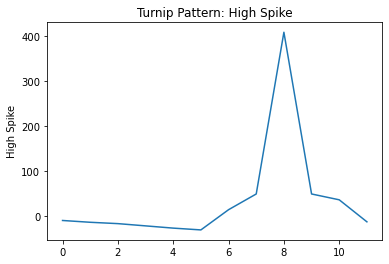

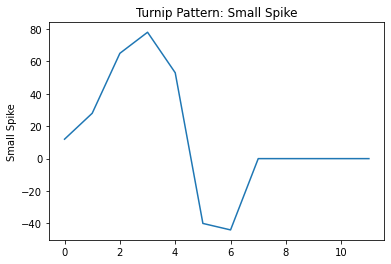

In [16]:
all_df, all_indexes = construct_graph_data(all_X, all_y)
graph_turnip_prices(all_df, all_df.index)

In [10]:
def figure_out_wrong_data(rows, indexes):
    df = pd.DataFrame([str(row) for row in rows])
    graphed_rows = df.iloc[indexes]
    return list(graphed_rows.index), df

In [11]:
bad, df = figure_out_wrong_data([row for row in all_rows], all_indexes)
print(bad)
bad_rows = [rows[b] for b in bad]
[str(row) for row in bad_rows]

[17, 3, 1, 0]


['Island Beast (Luce), W3, Purchase: 106, Curr Pattern: TurnipPattern.DECREASING, Prev Pattern: TurnipPattern.HIGH_SPIKE, Prices: [94, 90, 86, 81, 76, 71, 66, 59, 54, None, None, 46]',
 'Island Pearadise (Eggy), W3, Purchase: 92, Curr Pattern: TurnipPattern.RANDOM, Prev Pattern: TurnipPattern.SMALL_SPIKE, Prices: [None, None, 125, 106, 57, 50, 44, 120, 126, 100, 110, 122]',
 'Island Erijima (Aika), W3, Purchase: 100, Curr Pattern: TurnipPattern.HIGH_SPIKE, Prev Pattern: TurnipPattern.DECREASING, Prices: [90, 86, 83, 78, 73, 69, 114, 149, 509, 149, 136, 87]',
 'Island Knight (Maddox), W3, Purchase: 102, Curr Pattern: TurnipPattern.SMALL_SPIKE, Prev Pattern: TurnipPattern.HIGH_SPIKE, Prices: [114, 130, 167, 180, 155, 62, 58, None, None, None, None, None]']

In [12]:
  df

,0
0,"Island Knight (Maddox), W3, Purchase: 102, Cur..."
1,"Island Erijima (Aika), W3, Purchase: 100, Curr..."
2,"Island Shmeow (Riadh), W3, Purchase: 95, Curr ..."
3,"Island Pearadise (Eggy), W3, Purchase: 92, Cur..."
4,"Island Alethela (Dave), W3, Purchase: 101, Cur..."
...,...
66,"Island Yes (Anthony), W4, Purchase: 97, Curr P..."
67,"Island ANXIETY (Beans), W4, Purchase: 91, Curr..."
68,"Island The Matrix (Radirific), W4, Purchase: 9..."
69,"Island Skyrule (Fayruj), W4, Purchase: 104, Cu..."
